# Vehicle follower
Tasks:
1. List all vehicles in scene
2. Delete all vehicles
3. Recreate all vehicles
## Preliminaries
Assumptions are:
1. Carla 0.9.13 si running
2. Python version is 3.9.6
3. Python API version is 0.9.13

In [8]:
import carla 
import math 
import random 
import time 

In [33]:
# ipykernel for debugging line by line
!pip install -U ipykernel

## Check
### TODO check versions

In [1]:
import sys
import carla

# Check Python version
if sys.version_info < (3, 6, 9):
    raise ValueError("Python version 3.6.9 or higher is required.")

# Check Carla module version
required_carla_version = "0.9.13"
if carla.__version__ != required_carla_version:
    raise ValueError(f"Carla module version {required_carla_version} is required.")

# If the code reaches this point, the versions are correct
print("Python and Carla module versions are correct.")
## todo fix carla version
for member in dir(carla):
    print(member)

AttributeError: module 'carla' has no attribute '__version__'

## Connect to client and get world object

In [2]:
# Connect to the client and get the world object
client = carla.Client('localhost', 2000) 
world = client.get_world() 


## Load Town04

In [3]:
world = client.load_world('Town04')
# world methods
# methods = dir(world)
# # print(methods)
# for method in methods:
#     print(method)

In [4]:
# Get the blueprint library and the spawn points for the map
bp_lib = world.get_blueprint_library() 
spawn_points = world.get_map().get_spawn_points() 

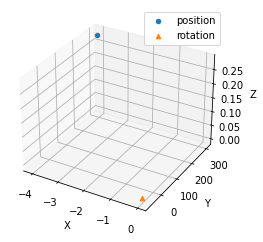

In [11]:
import carla
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

transform = random.choice(spawn_points) # carla.Transform()  # replace with your Transform object
position = np.array([transform.location.x, transform.location.y, transform.location.z])
rotation = np.array([transform.rotation.pitch, transform.rotation.yaw, transform.rotation.roll])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(position[0], position[1], position[2], marker='o', label='position')
ax.scatter(rotation[0], rotation[1], rotation[2], marker='^', label='rotation')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

In [5]:
print(type(random.choice(spawn_points))) # carla.libcarla.Transform
print(type(spawn_points)) #list
print(len(spawn_points)) # 155
print(spawn_points[0]) # <carla.libcarla.Transform at 0x7f390c035570>
print(type(spawn_points[0])) #carla.libcarla.Transform

for i in range(0, len(spawn_points)):
    transform = spawn_points[i] # carla.Transform()  # replace with your Transform object
    for k, v in transform.__dict__.items():
        print(f"{k}: {v}")   

# type (spawn_points)

for k, v in spawn_points[0].__dict__.items():
    print(f"{k}: {v}") 

NameError: name 'random' is not defined

In [6]:
transform = spawn_points[0]
type(transform)
transform.__dict__.items()
methods = dir(transform)
# print(methods)
for method in methods:
    print(method)

__class__
__delattr__
__dict__
__dir__
__doc__
__eq__
__format__
__ge__
__getattribute__
__gt__
__hash__
__init__
__init_subclass__
__instance_size__
__le__
__lt__
__module__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__sizeof__
__str__
__subclasshook__
__weakref__
get_forward_vector
get_inverse_matrix
get_matrix
get_right_vector
get_up_vector
location
rotation
transform
transform_vector


In [25]:
type(transform.__eq__(transform))
transform.__eq__(transform)
type(transform.get_forward_vector())

carla.libcarla.Vector3D

## Spawn a vehicle

In [7]:
# Get the blueprint for the vehicle you want
vehicle_bp = bp_lib.find('vehicle.lincoln.mkz_2020') 

# Try spawning the vehicle at a randomly chosen spawn point
vehicle = world.try_spawn_actor(vehicle_bp, random.choice(spawn_points))

NameError: name 'random' is not defined

## List all available vehicles  

In [7]:
vehicles = bp_lib.filter('vehicle.*')

# Print vehicle information
print("\nAvailable Vehicles in CARLA:")
print("-" * 40)

# Group vehicles by manufacturer
vehicle_dict = {}
for vehicle in vehicles:
    # Get manufacturer (first part of ID after 'vehicle.')
    manufacturer = vehicle.id.split('.')[1]
    
    if manufacturer not in vehicle_dict:
        vehicle_dict[manufacturer] = []
    
    vehicle_dict[manufacturer].append({
        'id': vehicle.id,
        'model': vehicle.id.split('.')[-1],
        'tags': vehicle.tags
    })

# Print organized results
for manufacturer in sorted(vehicle_dict.keys()):
    print(f"\n{manufacturer.upper()}:")
    print("-" * 20)
    for vehicle in sorted(vehicle_dict[manufacturer], key=lambda x: x['id']):
        print(f"Model: {vehicle['model']}")
        print(f"Full ID: {vehicle['id']}")
        print(f"Tags: {', '.join(vehicle['tags'])}")
        print("-" * 10)


Available Vehicles in CARLA:
----------------------------------------

AUDI:
--------------------
Model: a2
Full ID: vehicle.audi.a2
Tags: a2, audi, vehicle
----------
Model: etron
Full ID: vehicle.audi.etron
Tags: etron, audi, vehicle
----------
Model: tt
Full ID: vehicle.audi.tt
Tags: tt, audi, vehicle
----------

BH:
--------------------
Model: crossbike
Full ID: vehicle.bh.crossbike
Tags: crossbike, bh, vehicle
----------

BMW:
--------------------
Model: grandtourer
Full ID: vehicle.bmw.grandtourer
Tags: grandtourer, bmw, vehicle
----------

CARLAMOTORS:
--------------------
Model: carlacola
Full ID: vehicle.carlamotors.carlacola
Tags: carlacola, carlamotors, vehicle
----------
Model: firetruck
Full ID: vehicle.carlamotors.firetruck
Tags: carlamotors, firetruck, vehicle
----------

CHEVROLET:
--------------------
Model: impala
Full ID: vehicle.chevrolet.impala
Tags: impala, chevrolet, vehicle
----------

CITROEN:
--------------------
Model: c3
Full ID: vehicle.citroen.c3
Tags: c3

## Latex table with Carla vehicle models

In [40]:
vehicles = bp_lib.filter('vehicle.*')

# Start LaTeX table with centering
print("\\begin{table}[h]")
print("\\centering")
print("\\begin{tabular}{|l|l|l|}")
print("\\hline")
print("Manufacturer & Model & Blueprint ID \\\\")
print("\\hline")

# Group vehicles by manufacturer
vehicle_dict = {}
for vehicle in vehicles:
   manufacturer = vehicle.id.split('.')[1]
   
   if manufacturer not in vehicle_dict:
       vehicle_dict[manufacturer] = []
   
   vehicle_dict[manufacturer].append({
       'id': vehicle.id,
       'model': vehicle.id.split('.')[-1],
   })

# Print organized results in LaTeX format
for manufacturer in sorted(vehicle_dict.keys()):
   manufacturer_vehicles = sorted(vehicle_dict[manufacturer], key=lambda x: x['model'])
   
   for vehicle in manufacturer_vehicles:
       blueprint_id = f"vehicle.{manufacturer}.{vehicle['model']}"
       print(f"{manufacturer} & {vehicle['model']} & {blueprint_id} \\\\")
       print("\\hline")

# End LaTeX table
print("\\end{tabular}")
print("\\caption{Available vehicles in CARLA simulator with their blueprint IDs}")
print("\\label{tab:carla-vehicles}")
print("\\end{table}")

\begin{table}[h]
\centering
\begin{tabular}{|l|l|l|}
\hline
Manufacturer & Model & Blueprint ID \\
\hline
audi & a2 & vehicle.audi.a2 \\
\hline
audi & etron & vehicle.audi.etron \\
\hline
audi & tt & vehicle.audi.tt \\
\hline
bh & crossbike & vehicle.bh.crossbike \\
\hline
bmw & grandtourer & vehicle.bmw.grandtourer \\
\hline
carlamotors & carlacola & vehicle.carlamotors.carlacola \\
\hline
carlamotors & firetruck & vehicle.carlamotors.firetruck \\
\hline
chevrolet & impala & vehicle.chevrolet.impala \\
\hline
citroen & c3 & vehicle.citroen.c3 \\
\hline
diamondback & century & vehicle.diamondback.century \\
\hline
dodge & charger_2020 & vehicle.dodge.charger_2020 \\
\hline
dodge & charger_police & vehicle.dodge.charger_police \\
\hline
dodge & charger_police_2020 & vehicle.dodge.charger_police_2020 \\
\hline
ford & ambulance & vehicle.ford.ambulance \\
\hline
ford & crown & vehicle.ford.crown \\
\hline
ford & mustang & vehicle.ford.mustang \\
\hline
gazelle & omafiets & vehicle.gazelle

In [8]:
methods = dir(vehicle)
for method in methods:
    print(method)

__class__
__contains__
__delattr__
__delitem__
__dir__
__doc__
__eq__
__format__
__ge__
__getattribute__
__getitem__
__gt__
__hash__
__init__
__init_subclass__
__iter__
__le__
__len__
__lt__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__setitem__
__sizeof__
__str__
__subclasshook__
clear
copy
fromkeys
get
items
keys
pop
popitem
setdefault
update
values


## Spawn cyclist

In [9]:
# Get the blueprint for the vehicle you want
vehicle_bp = bp_lib.find('vehicle.bh.crossbike') 

# Try spawning the vehicle at a randomly chosen spawn point
vehicle = world.try_spawn_actor(vehicle_bp, random.choice(spawn_points))



In [10]:
for v in world.get_actors().filter('*vehicle*'): 
    v.set_autopilot(True) 

In [11]:
# Move the spectator behind the vehicle 
spectator = world.get_spectator() 
transform = carla.Transform(vehicle.get_transform().transform(carla.Location(x=-4,z=2.5)),vehicle.get_transform().rotation) 
spectator.set_transform(transform) 

## Transforms   

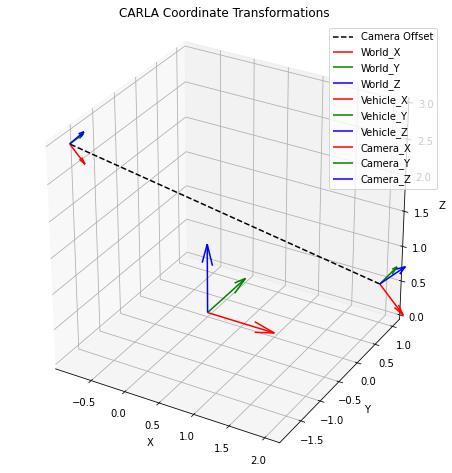

Vehicle Location: Location(x=2.000000, y=1.000000, z=0.500000)
Vehicle Rotation: Rotation(pitch=0.000000, yaw=45.000000, roll=0.000000)
Camera Relative Location: Location(x=-0.828427, y=-1.828427, z=3.000000)
Camera World Location: Vector3D(x=-0.828427, y=-1.828427, z=3.000000)


(<carla.libcarla.Transform at 0x7f16c1c7b1b8>,
 <carla.libcarla.Vector3D at 0x7f16c9f49348>)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import carla
import math

def plot_coordinate_frame(ax, origin, rotation, scale=1.0, label=''):
    """Plot a coordinate frame with given origin and rotation."""
    # Create rotation matrix from euler angles (in radians)
    pitch, yaw, roll = rotation.pitch * np.pi/180, rotation.yaw * np.pi/180, rotation.roll * np.pi/180
    
    # Rotation matrices for each axis
    Rx = np.array([[1, 0, 0],
                   [0, np.cos(pitch), -np.sin(pitch)],
                   [0, np.sin(pitch), np.cos(pitch)]])
    
    Ry = np.array([[np.cos(yaw), 0, np.sin(yaw)],
                   [0, 1, 0],
                   [-np.sin(yaw), 0, np.cos(yaw)]])
    
    Rz = np.array([[np.cos(roll), -np.sin(roll), 0],
                   [np.sin(roll), np.cos(roll), 0],
                   [0, 0, 1]])
    
    # Combined rotation matrix
    R = Rz @ Ry @ Rx
    
    # Unit vectors
    vectors = np.eye(3) * scale
    
    # Transform and plot each axis
    colors = ['r', 'g', 'b']
    labels = ['X', 'Y', 'Z']
    
    for i in range(3):
        v = R @ vectors[i]
        ax.quiver(origin.x, origin.y, origin.z,
                 v[0], v[1], v[2],
                 color=colors[i], label=f'{label}{labels[i]}')

def demonstrate_transform():
    # Create figure
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # World coordinate frame
    world_origin = carla.Location(0, 0, 0)
    world_rotation = carla.Rotation(0, 0, 0)
    plot_coordinate_frame(ax, world_origin, world_rotation, scale=1.0, label='World_')
    
    # Vehicle coordinate frame
    vehicle_loc = carla.Location(2, 1, 0.5)
    vehicle_rot = carla.Rotation(pitch=0, yaw=45, roll=0)  # 45-degree yaw
    plot_coordinate_frame(ax, vehicle_loc, vehicle_rot, scale=0.5, label='Vehicle_')
    
    # Camera coordinate frame (relative to vehicle)
    camera_relative = carla.Location(x=-4, z=2.5)  # As in your spectator code
    vehicle_transform = carla.Transform(vehicle_loc, vehicle_rot)
    camera_world = vehicle_transform.transform(camera_relative)
    
    plot_coordinate_frame(ax, camera_world, vehicle_rot, scale=0.3, label='Camera_')
    
    # Plot points and connecting lines
    ax.plot([vehicle_loc.x, camera_world.x],
            [vehicle_loc.y, camera_world.y],
            [vehicle_loc.z, camera_world.z],
            'k--', label='Camera Offset')
    
    # Set labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('CARLA Coordinate Transformations')
    
    # Set equal aspect ratio
    ax.set_box_aspect([1,1,1])
    
    # Add legend
    ax.legend()
    
    # Show grid
    ax.grid(True)
    
    plt.show()

# Example usage
demonstrate_transform()

# Demonstration of transform calculations
def explain_transform():
    # Create a vehicle transform
    vehicle_loc = carla.Location(2, 1, 0.5)
    vehicle_rot = carla.Rotation(pitch=0, yaw=45, roll=0)
    vehicle_transform = carla.Transform(vehicle_loc, vehicle_rot)
    
    # Create relative camera location
    camera_relative = carla.Location(x=-4, z=2.5)
    
    # Get world camera position
    camera_world = vehicle_transform.transform(camera_relative)
    
    print("Vehicle Location:", vehicle_loc)
    print("Vehicle Rotation:", vehicle_rot)
    print("Camera Relative Location:", camera_relative)
    print("Camera World Location:", camera_world)
    
    return vehicle_transform, camera_world

explain_transform()

## Set autopilot

In [13]:
# for v in world.get_actors().filter('*vehicle*'): 
#     v.set_autopilot(True) 

type(world.get_actors().filter('*vehicle*')) #carla.libcarla.ActorList
type(world.get_actors().filter('*vehicle*')[0]) #carla.libcarla.Vehicle


carla.libcarla.Vehicle

In [14]:
vehicle.set_autopilot(True)

## Follow vehicle

In [15]:
import time
import math

def follow_vehicle_with_camera(world, vehicle, spectator):
    """
    Creates a smooth following camera that tracks a vehicle from behind.
    
    Args:
        world: CARLA world object
        vehicle: The vehicle actor to follow
        spectator: The spectator object to control camera view
    """
     
    try:
        while True:
            # Update spectator transform to follow vehicle
            transform = carla.Transform(vehicle.get_transform().transform(carla.Location(x=-4,z=2.5)),vehicle.get_transform().rotation)
            spectator.set_transform(transform)
            
            # Add a small delay to control update frequency and reduce CPU usage
            time.sleep(0.01)
            
    except KeyboardInterrupt:
        print("\nCamera following stopped by user")

follow_vehicle_with_camera(world, vehicle, spectator)        


Camera following stopped by user


## Follow vehicle with changing views

In [19]:
import carla
import time
import math

# Global camera configuration
class CameraConfig:
    def __init__(self):
        # Default to rear view
        self.x_offset = -4.0  # negative is behind, positive is in front
        self.y_offset = 0.0   # negative is left, positive is right
        self.z_offset = 2.5   # height above vehicle
        self.rotation_offset = carla.Rotation(0, 0, 0)  # pitch, yaw, roll offsets

# Create global instance
camera_config = CameraConfig()

# Preset view configurations
def set_rear_view():
    camera_config.x_offset = -4.0
    camera_config.y_offset = 0.0
    camera_config.z_offset = 2.5
    camera_config.rotation_offset = carla.Rotation(0, 0, 0)

def set_front_view():
    #camera_config.x_offset = 4.0
    camera_config.x_offset = 1.5
    camera_config.y_offset = 0.0
    #camera_config.z_offset = 2.5
    camera_config.z_offset = 1.5
    camera_config.rotation_offset = carla.Rotation(0, 180, 0)  # Rotate 180° to face vehicle

def set_right_profile():
    camera_config.x_offset = 0.0
    camera_config.y_offset = 4.0
    camera_config.z_offset = 2.5
    camera_config.rotation_offset = carla.Rotation(0, 90, 0)  # Rotate 90° to face vehicle

def set_left_profile():
    camera_config.x_offset = 0.0
    camera_config.y_offset = -4.0
    #camera_config.y_offset = -4.0
    camera_config.z_offset = 2.5
    camera_config.rotation_offset = carla.Rotation(0, -90, 0)  # Rotate -90° to face vehicle

def set_top_down():
    camera_config.x_offset = 0.0
    camera_config.y_offset = 0.0
    camera_config.z_offset = 8.0
    camera_config.rotation_offset = carla.Rotation(-90, 0, 0)  # Look straight down

def set_custom_view(x, y, z, pitch=0, yaw=0, roll=0):
    camera_config.x_offset = x
    camera_config.y_offset = y
    camera_config.z_offset = z
    camera_config.rotation_offset = carla.Rotation(pitch, yaw, roll)

def follow_vehicle_with_camera(world, vehicle, spectator):
    """
    Creates a configurable following camera that tracks a vehicle.
    Camera position can be modified in real-time using the camera_config global.
    """
    try:
        while True:
            # Get vehicle's transform
            vehicle_transform = vehicle.get_transform()
            
            # Create relative location based on current camera configuration
            relative_location = carla.Location(
                x=camera_config.x_offset,
                y=camera_config.y_offset,
                z=camera_config.z_offset
            )
            
            # Get world location for camera
            camera_world_loc = vehicle_transform.transform(relative_location)
            
            # Combine vehicle's rotation with camera rotation offset
            camera_rotation = carla.Rotation(
                pitch=vehicle_transform.rotation.pitch + camera_config.rotation_offset.pitch,
                yaw=vehicle_transform.rotation.yaw + camera_config.rotation_offset.yaw,
                roll=vehicle_transform.rotation.roll + camera_config.rotation_offset.roll
            )
            
            # Create and set the new transform
            transform = carla.Transform(camera_world_loc, camera_rotation)
            spectator.set_transform(transform)
            
            time.sleep(0.01)
            
    except KeyboardInterrupt:
        print("\nCamera following stopped by user")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage:
"""
# Start the following camera in a separate thread
import threading
camera_thread = threading.Thread(target=follow_vehicle_with_camera, args=(world, vehicle, spectator))
camera_thread.start()

# Now you can modify the view at any time:
set_front_view()  # Switch to front view
time.sleep(5)     # Watch from front for 5 seconds
set_right_profile()  # Switch to right side view
time.sleep(5)     # Watch from right for 5 seconds
set_custom_view(x=3, y=3, z=5, pitch=-15, yaw=45)  # Switch to custom angle
"""

'\n# Start the following camera in a separate thread\nimport threading\ncamera_thread = threading.Thread(target=follow_vehicle_with_camera, args=(world, vehicle, spectator))\ncamera_thread.start()\n\n# Now you can modify the view at any time:\nset_front_view()  # Switch to front view\ntime.sleep(5)     # Watch from front for 5 seconds\nset_right_profile()  # Switch to right side view\ntime.sleep(5)     # Watch from right for 5 seconds\nset_custom_view(x=3, y=3, z=5, pitch=-15, yaw=45)  # Switch to custom angle\n'

In [ ]:
# Start the camera following in a separate thread
import threading
camera_thread = threading.Thread(target=follow_vehicle_with_camera, args=(world, vehicle, spectator))
camera_thread.start()

# Then you can modify the view at any time from your main program:
while True:
    command = input("Enter view (rear/front/right/left/top): ")
    if command == "rear":
        set_rear_view()
    elif command == "front":
        set_front_view()
    elif command == "right":
        set_right_profile()
    elif command == "left":
        set_left_profile()
    elif command == "top":
        set_top_down()
    elif command == "quit":
        break

## Test camera positions    

In [ ]:
import carla
import time

def test_camera_positions(world, vehicle, spectator):
    # Test sequence
    test_positions = [
        # Format: (name, x, y, z, pitch, yaw, roll)
        ("Center", 0, 0, 2.5, 0, 0, 0),
        ("Right Close", 0, 2.0, 2.0, 0, 90, 0),
        ("Right Far", 0, 4.0, 2.0, 0, 90, 0),
        ("Left Close", 0, -2.0, 2.0, 0, -90, 0),
        ("Left Far", 0, -4.0, 2.0, 0, -90, 0),
    ]
    
    for name, x, y, z, pitch, yaw, roll in test_positions:
        print(f"\nTesting {name} view...")
        set_custom_view(x, y, z, pitch, yaw, roll)
        time.sleep(5)  # Wait to observe each position
        
        # Print current transform for verification
        transform = spectator.get_transform()
        print(f"Camera position: ({transform.location.x:.1f}, {transform.location.y:.1f}, {transform.location.z:.1f})")
        print(f"Camera rotation: ({transform.rotation.pitch:.1f}, {transform.rotation.yaw:.1f}, {transform.rotation.roll:.1f})")

# Usage:
camera_thread = threading.Thread(target=follow_vehicle_with_camera, args=(world, vehicle, spectator))
camera_thread.start()
test_camera_positions(world, vehicle, spectator)



Testing Center view...
Camera position: (-13.0, -100.1, 2.5)
Camera rotation: (-0.0, 89.6, -0.0)

Testing Right Close view...
Camera position: (-14.9, -77.8, 2.0)
Camera rotation: (0.0, 179.6, 0.0)

Testing Right Far view...
Camera position: (-16.8, -55.3, 2.0)
Camera rotation: (0.0, 179.6, 0.0)

Testing Left Close view...
Camera position: (-10.7, -32.3, 2.0)
Camera rotation: (-0.0, -0.1, 0.0)

Testing Left Far view...


KeyboardInterrupt: 

In [42]:
def set_right_profile():
    camera_config.x_offset = 0.0
    camera_config.y_offset = 2.5  # Reduced from 4.0
    camera_config.z_offset = 1.8  # Lower height for better view
    camera_config.rotation_offset = carla.Rotation(0, 90, 0)  # Rotate to face vehicle
    
def set_left_profile():
    camera_config.x_offset = 0.0
    camera_config.y_offset = -2.5  # Reduced from -4.0
    camera_config.z_offset = 1.8   # Lower height
    camera_config.rotation_offset = carla.Rotation(0, -90, 0)  # Rotate to face vehicle

# For testing specific angles:
def set_angled_side_view(side='right'):
    if side == 'right':
        set_custom_view(0.5, 2.5, 1.8, -5, 100, 0)  # Slight angle and tilt
    else:
        set_custom_view(0.5, -2.5, 1.8, -5, -100, 0)

set_angled_side_view(side='right')  
set_angled_side_view(side='left')       



In [95]:
# from the back, looking right at the cyclist, y offset to the left (negative)
camera_config.x_offset = -4.0
camera_config.y_offset = -4.0
camera_config.z_offset = 2.5
# camera looking to the right
camera_config.rotation_offset = carla.Rotation(0, 45, 0)

In [17]:
# from the back, looking left at the cyclist, y offset to the right (positive)
camera_config.x_offset = -4.0
camera_config.y_offset = 4.0
camera_config.z_offset = 2.5
# camera looking to the left
camera_config.rotation_offset = carla.Rotation(0, -45, 0)

NameError: name 'camera_config' is not defined

In [16]:
# from the front, looking right at the cyclist, y offset to the left (negative)
camera_config.x_offset = 4.0
camera_config.y_offset = -4.0
camera_config.z_offset = 2.5
# camera looking to the right
camera_config.rotation_offset = carla.Rotation(0, 135, 0)

NameError: name 'camera_config' is not defined

In [68]:
# from the front, looking left at the cyclist, y offset to the right (positive)
camera_config.x_offset = 4.0
camera_config.y_offset = 4.0
camera_config.z_offset = 2.5
# camera looking to the right
camera_config.rotation_offset = carla.Rotation(0, -135, 0)

In [92]:
def set_back_right_diagonal():
    camera_config.x_offset = -4.0  # Behind vehicle
    camera_config.y_offset = -4.0  # Left side
    camera_config.z_offset = 2.5   # Height
    camera_config.rotation_offset = carla.Rotation(0, 45, 0)  # Look right

def set_back_left_diagonal():
    camera_config.x_offset = -4.0  # Behind vehicle
    camera_config.y_offset = 4.0   # Right side
    camera_config.z_offset = 2.5   # Height
    camera_config.rotation_offset = carla.Rotation(0, -45, 0)  # Look left

def set_front_right_diagonal():
    camera_config.x_offset = 4.0   # Front of vehicle
    camera_config.y_offset = -4.0  # Left side
    camera_config.z_offset = 2.5   # Height
    camera_config.rotation_offset = carla.Rotation(0, 135, 0)  # Look right

def set_front_left_diagonal():
    camera_config.x_offset = 4.0   # Front of vehicle
    camera_config.y_offset = 4.0   # Right side
    camera_config.z_offset = 2.5   # Height
    camera_config.rotation_offset = carla.Rotation(0, -135, 0)  # Look left

def set_right_profile():
    camera_config.x_offset = 0.0   # No forward/back offset
    camera_config.y_offset = 4.0   # Offset to right side
    camera_config.z_offset = 2.0   # Standard height
    camera_config.rotation_offset = carla.Rotation(0, -90, 0)  # Face left to look at vehicle

def set_left_profile():
    camera_config.x_offset = 0.0   # No forward/back offset
    camera_config.y_offset = -4.0  # Offset to left side
    camera_config.z_offset = 2.0   # Standard height
    camera_config.rotation_offset = carla.Rotation(0, 90, 0)   # Face right to look at vehicle    

def set_back_view_tilted():
    camera_config.x_offset = -4.0  # Behind vehicle
    camera_config.y_offset = 0.0   
    camera_config.z_offset = 2.5   
    camera_config.rotation_offset = carla.Rotation(-30, 0, 0)  # 30 degrees down tilt

def set_front_view_tilted():
    camera_config.x_offset = 4.0   # Front of vehicle
    camera_config.y_offset = 0.0
    camera_config.z_offset = 2.5
    camera_config.rotation_offset = carla.Rotation(-30, 180, 0)  # 30 degrees down tilt, 180 to face vehicle    

In [23]:
# set_back_right_diagonal()
# set_back_left_diagonal()
# set_front_right_diagonal()
set_front_left_diagonal()
#set_right_profile()
#set_left_profile()
# set_back_view_tilted()

NameError: name 'set_front_left_diagonal' is not defined

: 

In [112]:
camera_config.x_offset = -4.0   # Front of vehicle
camera_config.y_offset = 4.0
camera_config.z_offset = 2.5
camera_config.rotation_offset = carla.Rotation(-10, -45, 0)

"""
Camera Rotation Reference Table
------------------------------
X-axis (Pitch):
  Negative (-): Tilt Down
  Positive (+): Tilt Up
  Example: -30° = look down, +30° = look up

Y-axis (Yaw):
    0° = Forward
   90° = Right
  -90° = Left
  180° = Backward

Z-axis (Roll):
  Negative (-): Counter-clockwise tilt
  Positive (+): Clockwise tilt
  Example: -45° = tilt left, +45° = tilt right

Common Combinations:
------------------
Back view:     (0°, 0°, 0°)    # Level, facing forward
Front view:    (0°, 180°, 0°)  # Level, facing vehicle
Right view:    (0°, 90°, 0°)   # Level, facing right
Left view:     (0°, -90°, 0°)  # Level, facing left
Angled down:   (-30°, Y, 0°)   # Add downward tilt to any view
"""

'\nCamera Rotation Reference Table\n------------------------------\nX-axis (Pitch):\n  Negative (-): Tilt Down\n  Positive (+): Tilt Up\n  Example: -30° = look down, +30° = look up\n\nY-axis (Yaw):\n    0° = Forward\n   90° = Right\n  -90° = Left\n  180° = Backward\n\nZ-axis (Roll):\n  Negative (-): Counter-clockwise tilt\n  Positive (+): Clockwise tilt\n  Example: -45° = tilt left, +45° = tilt right\n\nCommon Combinations:\n------------------\nBack view:     (0°, 0°, 0°)    # Level, facing forward\nFront view:    (0°, 180°, 0°)  # Level, facing vehicle\nRight view:    (0°, 90°, 0°)   # Level, facing right\nLeft view:     (0°, -90°, 0°)  # Level, facing left\nAngled down:   (-30°, Y, 0°)   # Add downward tilt to any view\n'

In [111]:
dir(camera_thread)
camera_running = threading.Event()
camera_running.set()
camera_running.clear()